<a href="https://colab.research.google.com/github/Joelzr01/Preprocesamiento-de-Datos/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Airbnb Case Study

Link: https://drive.google.com/open?id=1SVLta4AfPDY47sBV2MT6l1C6MXa6Kjc2&authuser=vpinargote%40espam.edu.ec&usp=drive_fs


In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/MyDrive'

'02. Construcción de modelos.xlsx'
 1.docx
 2.docx
 ARBOL.odt
'CC-0305 ED"A" - Clase presencial virtual (2022-01-14 at 11:08 GMT-8)'
 cinematicaJoel.pdf
'clase Poligono.pdf'
 Classroom
'Colab Notebooks'
'Copia de PMOInformatica Plantilla Acta de Proyecto.gdoc'
'Copia de train.csv'
'Desarrollo Ejercicios -UNIDAD 3.gdoc'
'Dexmen 11.docx'
'Dexmen 1.docx'
'Diagrama de casos de uso.gslides'
'ECOLOGÍA3 (1).gslides'
'ECOLOGÍA3 (2).gslides'
'ECOLOGÍA3 (3).gslides'
 ECOLOGÍA3.gslides
'Ecuaciones-metodo euler.gsheet'
'ejercicio 5.docx'
'ejercicio 6.docx'
'ejercicio 7.docx'
'ejercicio 7.jpg'
 ejercicio8.jpeg
'Ejercicios de estadistica distribuciones discretas y continuas.gdoc'
'Ejercicios resueltos integrales básicas.gdoc'
'Evaluación formativa 1.gdoc'
 Evaluación.gform
 Examen_Final.rar
'examen java.docx'
'F_2 .pdf'
'física 2.pdf'
'FORMATO DE GLOSARIO B-1.docx'
'formula .pdf'
'GE- Bases de datos.gdoc'
 grupal_joel_aaron.pdf
 herenciasimpleymultiple.odt
 imagen1.docx
 imagen_2021-06-29_1

In [ ]:
# airbnb = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA/AB_NYC_2019.csv')
#airbnb = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
type(airbnb)

pandas.core.frame.DataFrame

In [ ]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
#checking amount of rows in given dataset to understand the size we are working with
len(airbnb)

48895

In [ ]:
airbnb.shape

(48895, 16)

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Cleaning Data

In [ ]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [ ]:
airbnb.isna().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#examing the changes
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
airbnb.tail()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,6,2
48894,Trendy duplex in the very heart of Hell's Kitchen,68119814,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,1,23


In [ ]:
airbnb.shape

(48895, 13)

In [ ]:
airbnb.isna().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0
#Una sola imputacion
#airbnb.reviews_per_month.fillna(0, inplace=True)
#Mas de una sola imputacion
airbnb.fillna({'reviews_per_month':0}, inplace=True)



In [ ]:
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [ ]:
airbnb.isna().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
airbnb[airbnb.neighbourhood_group=='Bronx'].neighbourhood.unique()

array(['Highbridge', 'Clason Point', 'Eastchester', 'Kingsbridge',
       'Woodlawn', 'University Heights', 'Allerton', 'Concourse Village',
       'Concourse', 'Wakefield', 'Spuyten Duyvil', 'Mott Haven',
       'Longwood', 'Morris Heights', 'Port Morris', 'Fieldston',
       'Mount Eden', 'City Island', 'Williamsbridge', 'Soundview',
       'Co-op City', 'Parkchester', 'North Riverdale', 'Bronxdale',
       'Riverdale', 'Norwood', 'Claremont Village', 'Fordham',
       'Mount Hope', 'Van Nest', 'Morris Park', 'Tremont',
       'East Morrisania', 'Hunts Point', 'Pelham Bay', 'Throgs Neck',
       'West Farms', 'Morrisania', 'Pelham Gardens', 'Belmont',
       'Baychester', 'Melrose', 'Schuylerville', 'Castle Hill',
       'Olinville', 'Edenwald', 'Westchester Square', 'Unionport'],
      dtype=object)

In [ ]:
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
airbnb[airbnb.host_id==219517861]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38293,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
38294,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
38588,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
39769,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
39770,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,0.00,327,339
47692,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,0.00,327,342
47693,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,0.00,327,347
47814,Sonder | 116 John | Polished Studio + Gym,219517861,Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,0.00,327,327


In [ ]:
airbnb.host_id.value_counts()


219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [ ]:
airbnb.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
top_neighbor = airbnb.neighbourhood_group.value_counts()

In [ ]:
top_neighbor.index[0]

'Manhattan'

[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Bronx'),
 Text(4, 0, 'Staten Island')]

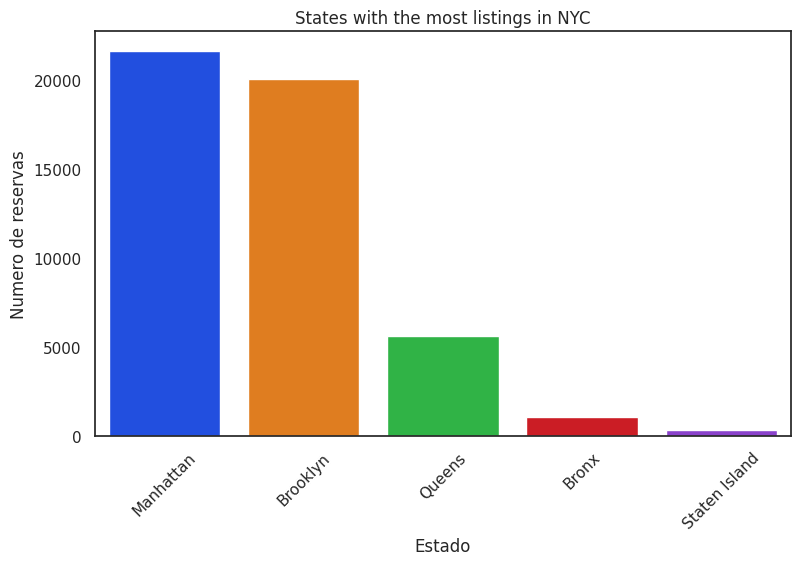

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('white')
colors = sns.color_palette('bright')
viz_1=sns.barplot(x=top_neighbor.index, y=top_neighbor.values, palette=sns.color_palette('bright'))
viz_1.set_title('States with the most listings in NYC')
viz_1.set_ylabel('Numero de reservas')
viz_1.set_xlabel('Estado')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [ ]:
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
airbnb.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
room_type = airbnb.room_type.value_counts()

**GRAFICO DE ROOM TYPE**

[Text(0, 0, 'Entire home/apt'),
 Text(1, 0, 'Private room'),
 Text(2, 0, 'Shared room')]

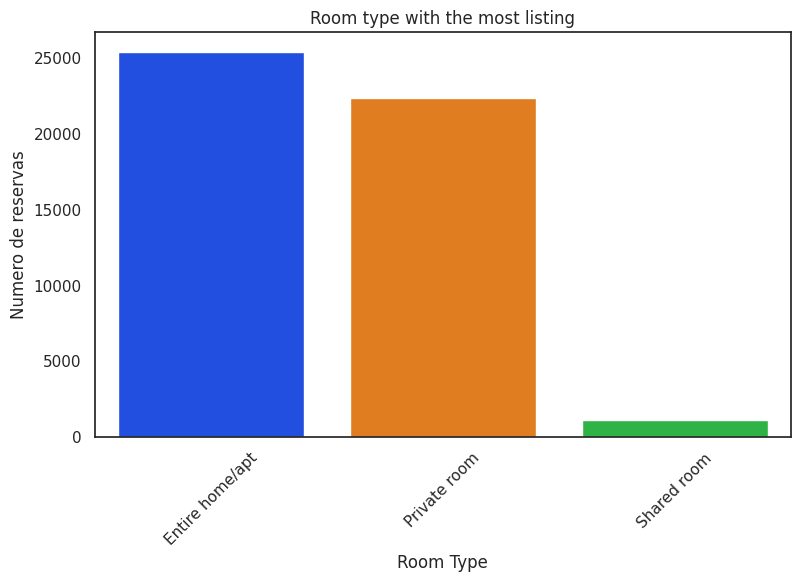

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('white')
colors = sns.color_palette('bright')
viz_1=sns.barplot(x=room_type.index, y=room_type.values, palette=sns.color_palette('bright'))
viz_1.set_title('Room type with the most listing')
viz_1.set_ylabel('Numero de reservas')
viz_1.set_xlabel('Room Type')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

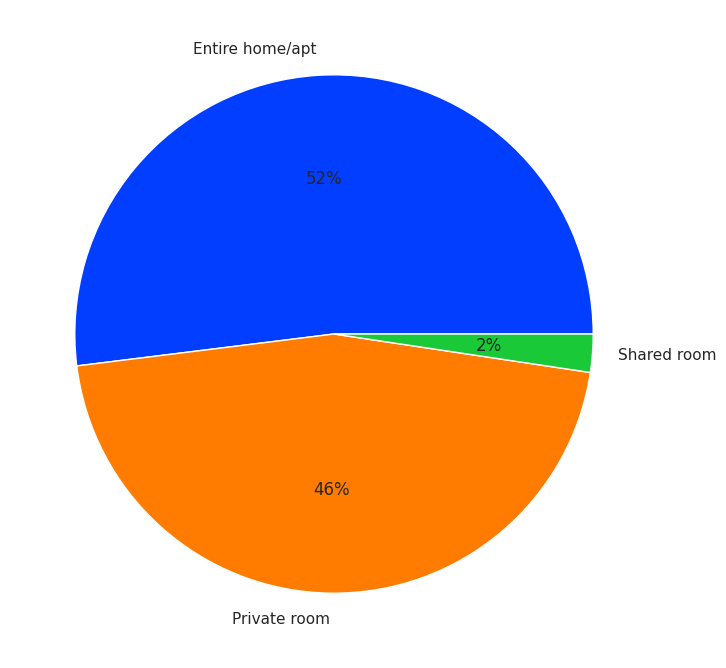

In [ ]:
colors = sns.color_palette('bright')
plt.pie(room_type.values, labels=room_type.index, colors = colors, autopct = '%0.0f%%')
plt.show()

## Exploring data

In [ ]:
airbnb.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
airbnb.name.value_counts().head(10)

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Private room in Brooklyn                       8
Beautiful Brooklyn Brownstone                  8
Name: name, dtype: int64

In [ ]:
# 10 top host
top_host=airbnb.host_id.value_counts().head(10)
top_host=airbnb.name.value_counts().head(10)
top_host

Hillside Hotel                                18
Home away from home                           17
New york Multi-unit building                  16
Brooklyn Apartment                            12
Loft Suite @ The Box House Hotel              11
Private Room                                  11
Private room                                  10
Artsy Private BR in Fort Greene Cumberland    10
Private room in Brooklyn                       8
Beautiful Brooklyn Brownstone                  8
Name: name, dtype: int64

In [ ]:
type(top_host)

pandas.core.series.Series

In [ ]:
top_host_check = airbnb.calculated_host_listings_count.max()
top_host_check

327

In [ ]:
pd.DataFrame(top_host).reset_index()

,index,name
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11
5,Private Room,11
6,Private room,10
7,Artsy Private BR in Fort Greene Cumberland,10
8,Private room in Brooklyn,8
9,Beautiful Brooklyn Brownstone,8


In [ ]:
# top host dataframe
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Name', 'name':'P_Count'}, inplace=True)
top_host_df

,Name,P_Count
0,Hillside Hotel,18
1,Home away from home,17
2,New york Multi-unit building,16
3,Brooklyn Apartment,12
4,Loft Suite @ The Box House Hotel,11
5,Private Room,11
6,Private room,10
7,Artsy Private BR in Fort Greene Cumberland,10
8,Private room in Brooklyn,8
9,Beautiful Brooklyn Brownstone,8


[Text(0, 0, 'Hillside Hotel'),
 Text(1, 0, 'Home away from home'),
 Text(2, 0, 'New york Multi-unit building'),
 Text(3, 0, 'Brooklyn Apartment'),
 Text(4, 0, 'Loft Suite @ The Box House Hotel'),
 Text(5, 0, 'Private Room'),
 Text(6, 0, 'Private room'),
 Text(7, 0, 'Artsy Private BR in Fort Greene Cumberland'),
 Text(8, 0, 'Private room in Brooklyn'),
 Text(9, 0, 'Beautiful Brooklyn Brownstone')]

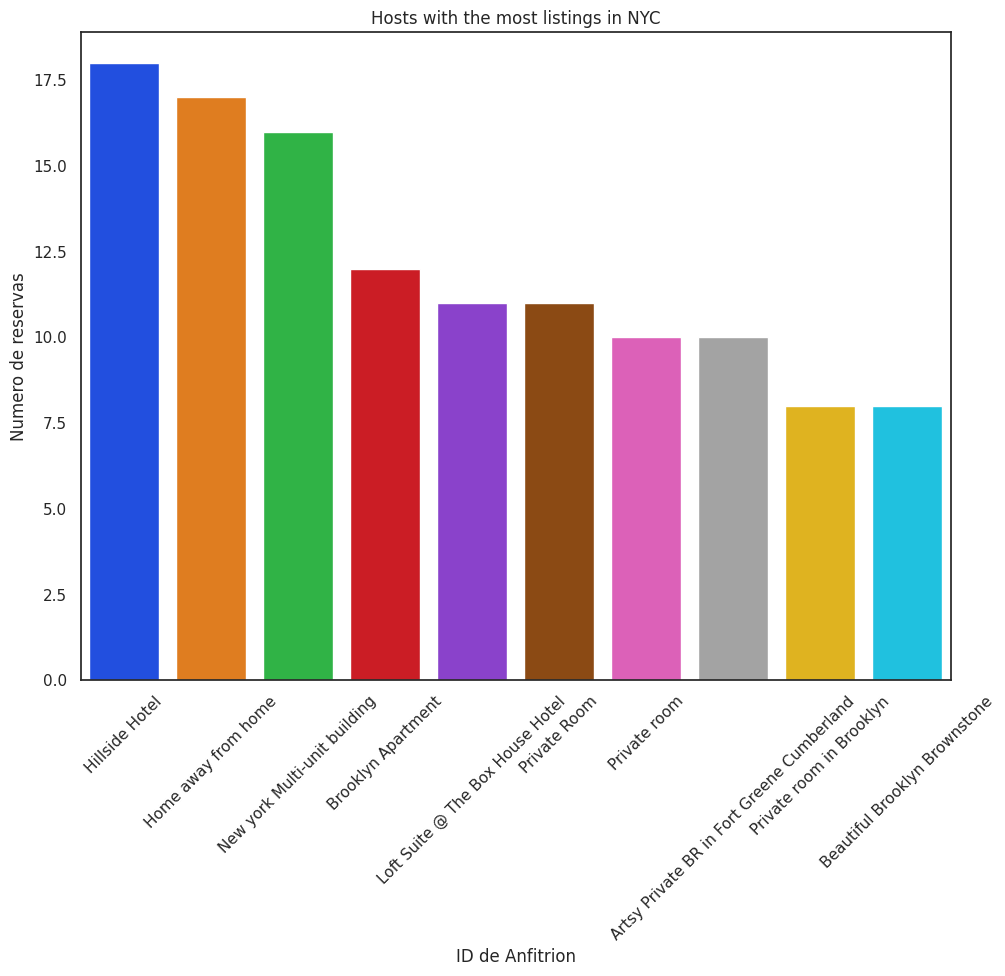

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
colors = sns.color_palette('bright')
viz_1=sns.barplot(x="Name", y="P_Count", data=top_host_df,
                 palette=sns.color_palette('bright'))
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Numero de reservas')
viz_1.set_xlabel('ID de Anfitrion')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

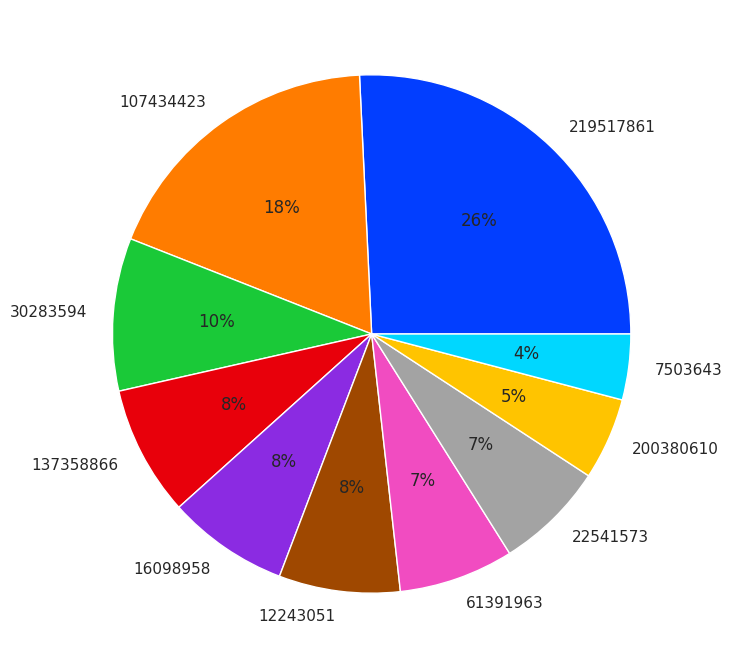

In [ ]:
colors = sns.color_palette('bright')
plt.pie(top_host_df.P_Count, labels=top_host_df.Host_ID, colors = colors, autopct = '%0.0f%%')
plt.show()

### Qué condado tiene los precios más altos?

In [ ]:
airbnb[airbnb.neighbourhood_group=='Brooklyn'].shape

(20104, 13)

In [ ]:
#Brooklyn
sub_1=airbnb[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [ ]:
type(price_list_by_n)

list

In [ ]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
p_l_b_n_2=[] # empty list

#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.50, .75])  #estadistica descriptivas
    #i=x.describe()                              #estadistica descriptivas
    i=i.iloc[3:]
    print(type(i))
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


Esta es una forma mas eficiente de hacer lo anterior

In [ ]:
lista = airbnb.groupby('neighbourhood_group').price

In [ ]:
listadf =list(lista)
listadf

[('Bronx', 171       40
  207       45
  260       90
  261      105
  309       90
          ... 
  48783    140
  48792     80
  48795    125
  48796     70
  48805    100
  Name: price, Length: 1091, dtype: int64), ('Brooklyn', 0        149
  3         89
  6         60
  12        89
  15       140
          ... 
  48882     40
  48884    190
  48887    170
  48890     70
  48891     40
  Name: price, Length: 20104, dtype: int64), ('Manhattan', 1        225
  2        150
  4         80
  5        200
  7         79
          ... 
  48886    200
  48888    125
  48892    115
  48893     55
  48894     90
  Name: price, Length: 21661, dtype: int64), ('Queens', 46       130
  77        70
  143      140
  161       79
  181      350
          ... 
  48858     68
  48863     93
  48866     58
  48878     45
  48889     65
  Name: price, Length: 5666, dtype: int64), ('Staten Island', 169       70
  249       36
  250       37
  251       37
  256       36
          ... 
  48441     40


In [ ]:
p_l_b_n_df = pd.DataFrame({'Stats':['min','25%','50%','75%', 'max']}) # empty list
for x in listadf:
  city = x[0]
  i = x[1].describe()
  i = pd.DataFrame(i)
  print(type(i))
  i=i.iloc[3:]
  i.reset_index(inplace=True)
  p_l_b_n_df[city]= i['price']

p_l_b_n_df.set_index('Stats', inplace=True)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
p_l_b_n_df

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
Stats,,,,,
min,0.0,0.0,0.0,10.0,13.0
25%,45.0,60.0,95.0,50.0,50.0
50%,65.0,90.0,150.0,75.0,75.0
75%,99.0,150.0,220.0,110.0,110.0
max,2500.0,10000.0,10000.0,10000.0,5000.0


In [ ]:
airbnb.price.max()

10000

In [ ]:
airbnb[airbnb.price > 500]

In [ ]:
sub_6=airbnb[airbnb.price <= 500]
sub_6.shape

(47851, 13)

In [ ]:
sub_6.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

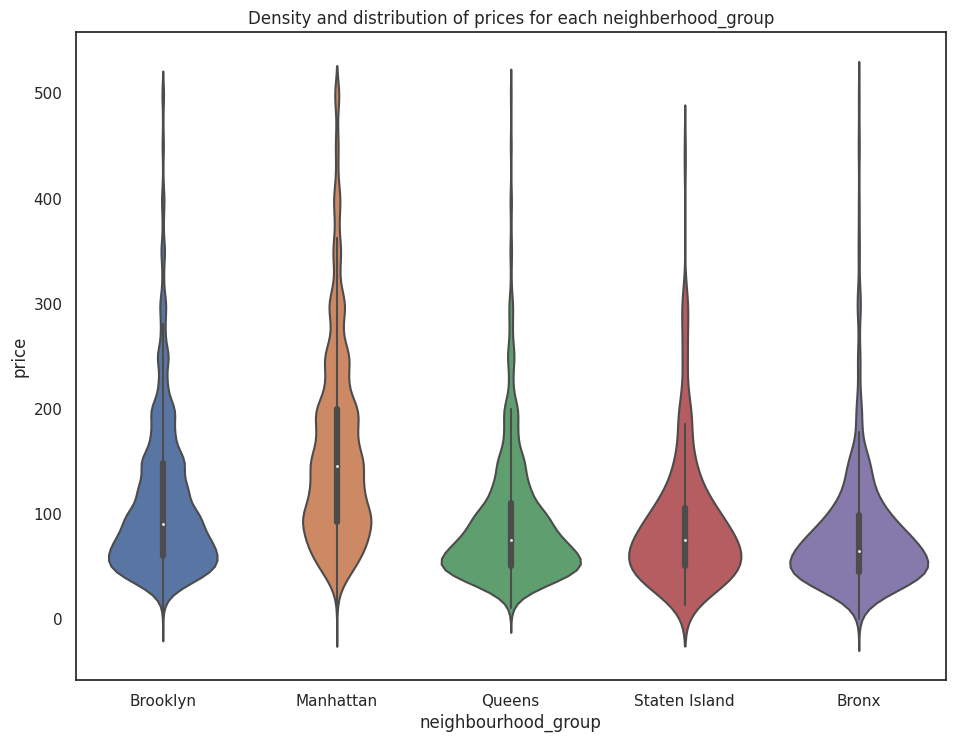

In [ ]:
# CUIDADO CON VALORES ATÍPICOS

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price <= 500]
#using violinplot to showcase density and distribtuion of prices
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In [ ]:
airbnb.shape

(48895, 13)

In [ ]:
sub_6.shape

(47851, 13)

In [ ]:
#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [ ]:
airbnb.loc[airbnb.neighbourhood.isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


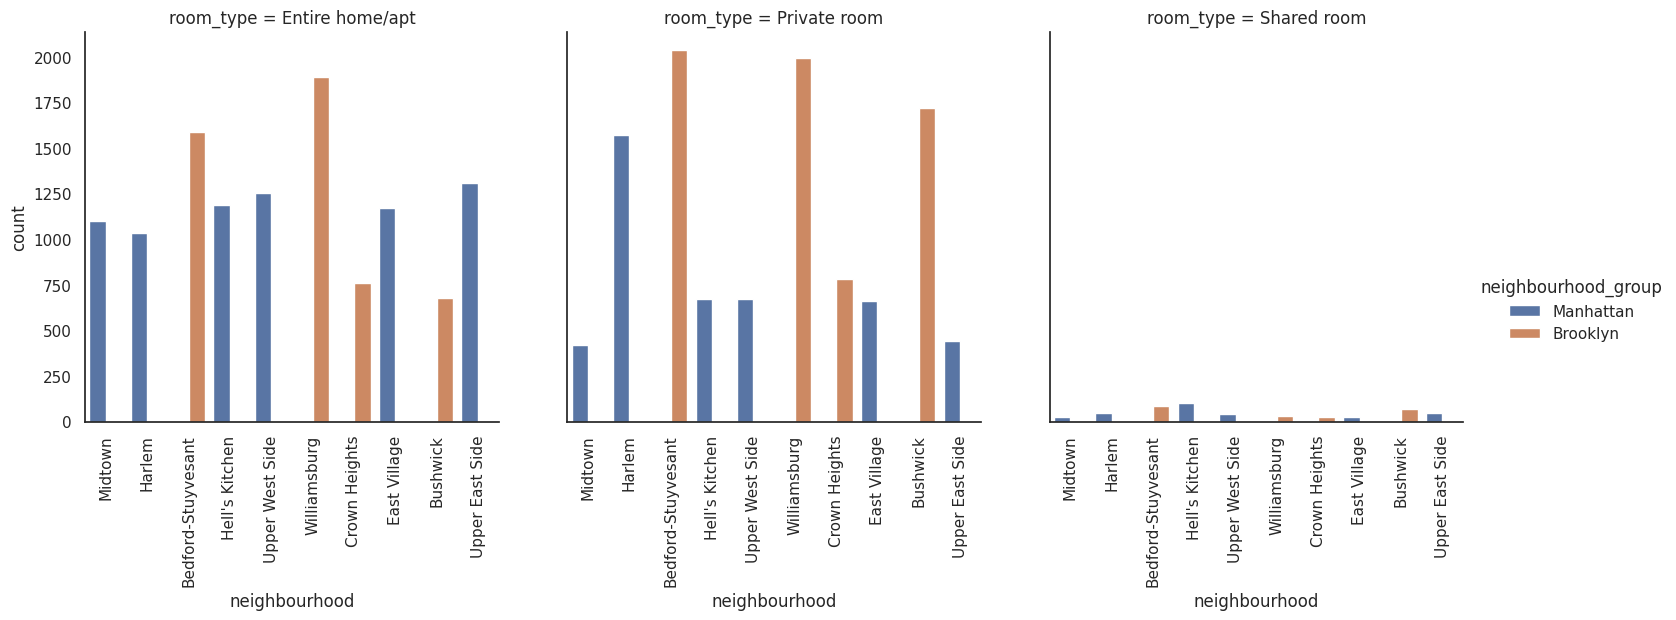

In [ ]:
#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb.neighbourhood.isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

## Análisis Espacial

In [ ]:
sub_8 = sub_7[sub_7.price <= 500]

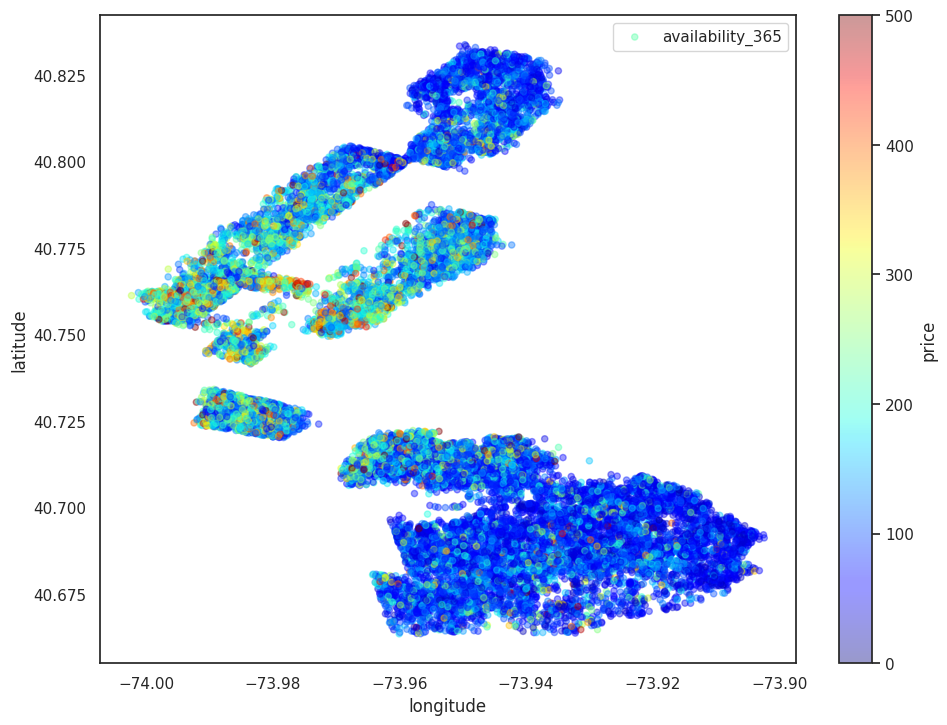

In [ ]:
#let's see how scatterplot will come out
viz_4=sub_8.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

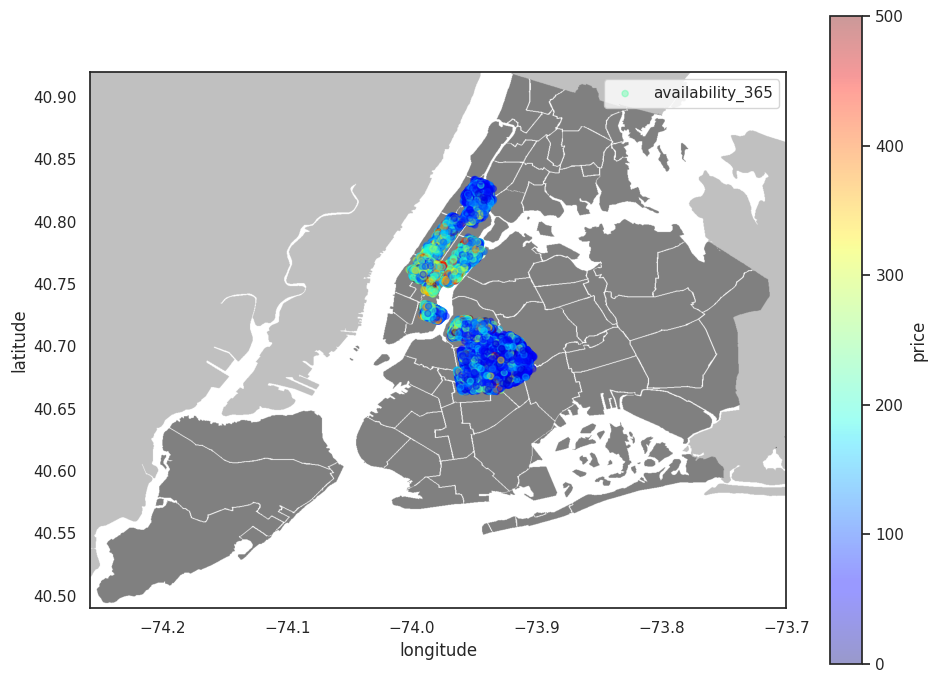

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
# nyc_img=plt.imread(i)

nyc_img = Image.open(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_8.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

In [ ]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
airbnbSlice = airbnb.iloc[:, 2:]
df = pd.get_dummies(airbnbSlice, columns=['neighbourhood_group','neighbourhood','room_type'], drop_first=True)

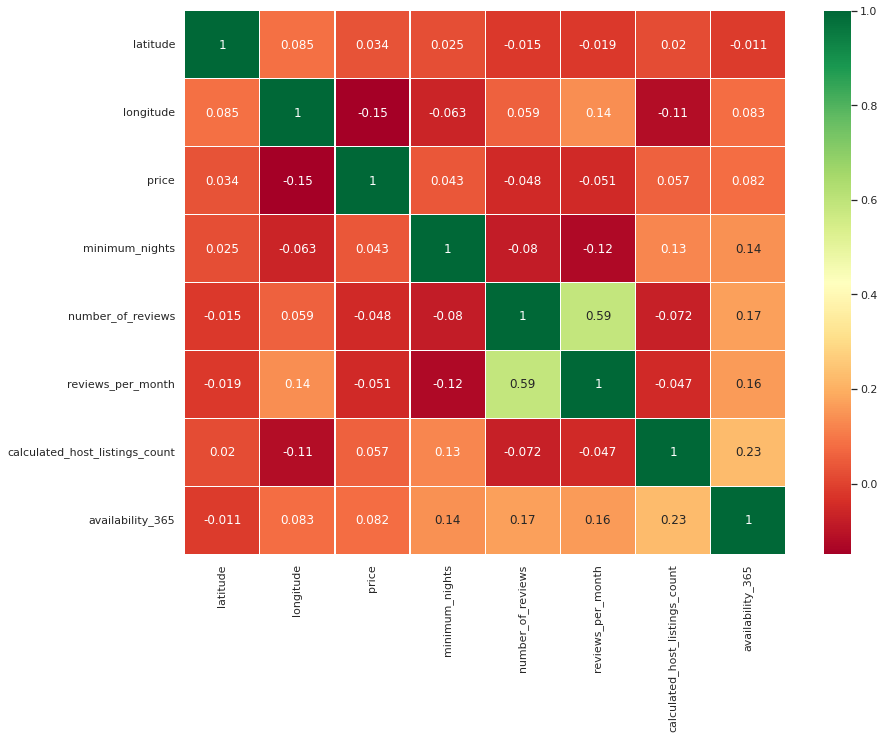

In [ ]:
import seaborn as sns

sns.heatmap(airbnbSlice.corr(), annot= True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()